In [128]:
import pandas as pd
import graphviz
import numpy as np
import os
import seaborn as sns
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [129]:
#Importando data set
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [130]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [132]:
#classificando colunas
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Sex_code'] = df_train['Sex'].cat.codes

df_train['Cabin'] = df_train['Cabin'].astype('category')
df_train['Cabin_code'] = df_train['Cabin'].cat.codes

df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['Embarked_code'] = df_train['Embarked'].cat.codes

In [133]:
df_trainX = df_train[['Survived','Pclass','Age','Sex_code','Parch','Fare']]
df_trainX.shape

(891, 6)

In [134]:
df_trainX.dropna(inplace = True)
df_trainX.shape

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(714, 6)

In [135]:
df_trainY = df_trainX[['Survived']]
df_trainX = df_trainX[['Pclass','Age','Sex_code','Fare','Parch']]


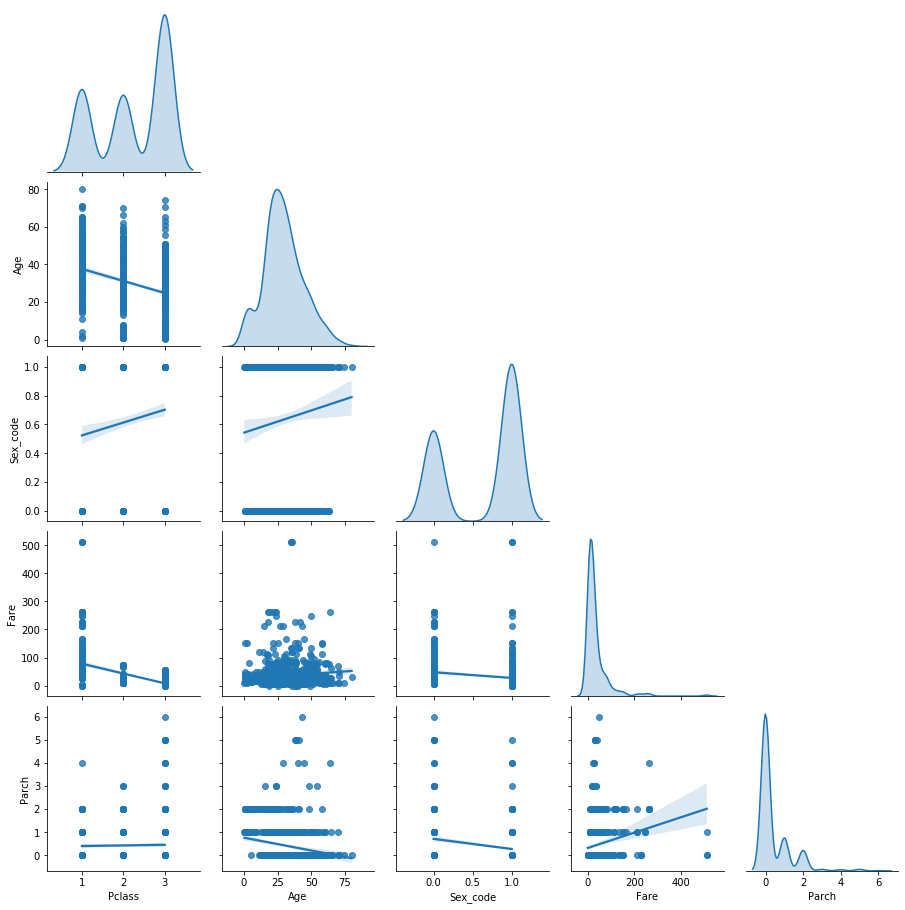

In [136]:
sns.pairplot(df_trainX, diag_kind="kde", corner = True, kind = "reg")

In [137]:
from sklearn import tree


In [138]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_trainX,df_trainY)
#gerando o score do treino
print( "Score: " + str(np.round(clf.score(df_trainX, df_trainY)*100,2)) + '%')

Score: 98.46%


In [139]:
#classificando colunas
df_test['Sex'] = df_test['Sex'].astype('category')
df_test['Sex_code'] = df_test['Sex'].cat.codes
df_test['Cabin'] = df_test['Cabin'].astype('category')
df_test['Cabin_code'] = df_test['Cabin'].cat.codes
df_test['Embarked'] = df_test['Embarked'].astype('category')
df_test['Embarked_code'] = df_test['Embarked'].cat.codes

In [143]:
#separando as colunas de teste
df_testX = df_test[['Pclass','Age','Sex_code','Fare','Parch']]
df_testX.head()



,Pclass,Age,Sex_code,Fare,Parch
0,3,34.5,1,7.8292,0
1,3,47.0,0,7.0000,0
2,2,62.0,1,9.6875,0
3,3,27.0,1,8.6625,0
4,3,22.0,0,12.2875,1


In [144]:
#verificando valores inválidos
df_testX.isna().sum()

Pclass       0
Age         86
Sex_code     0
Fare         1
Parch        0
dtype: int64

In [145]:
#completando os valores inválidos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy=  'mean')
imputer = imputer.fit(df_testX)
df_testX = pd.DataFrame(imputer.transform(df_testX),columns=['Pclass','Age','Sex_code','Fare','Parch'])

In [146]:
#gerando a predição de resultados
df_testX['Survived'] = clf.predict(df_testX)

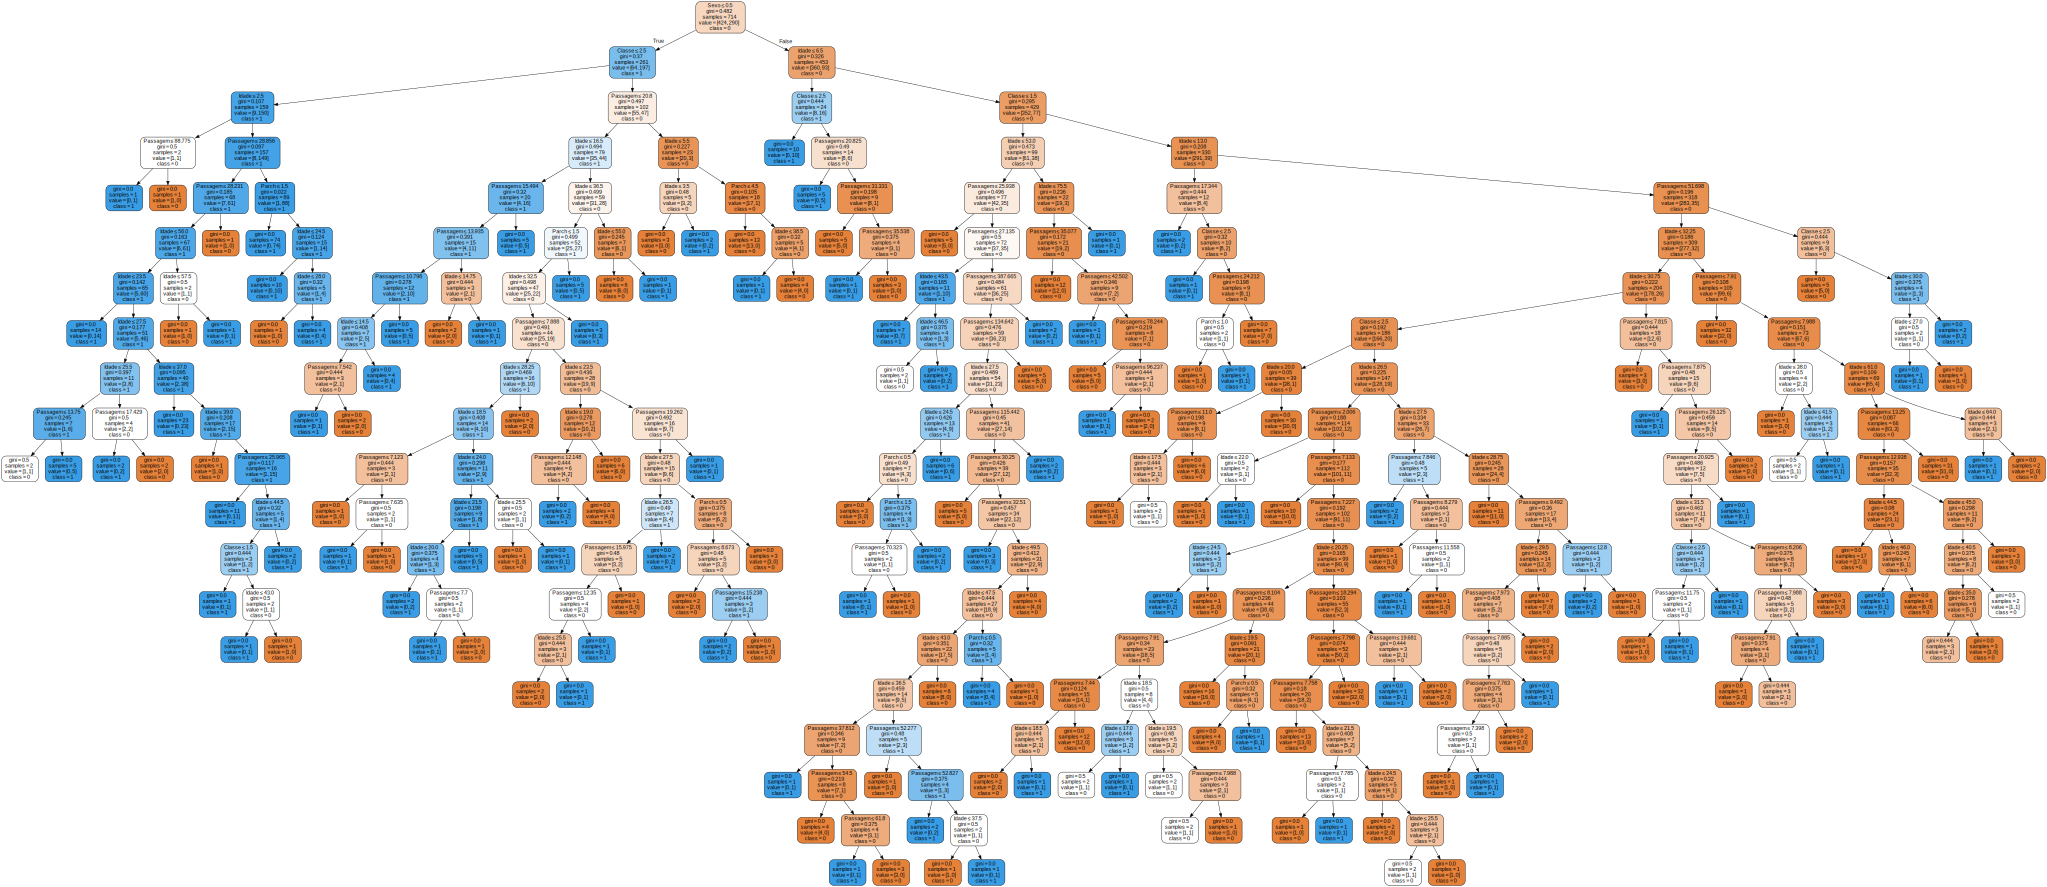

In [147]:
#desenhando a árvore de decisão
dt_target_names = [str(s) for s in df_trainY['Survived'].unique()]


dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=['Classe','Idade','Sexo','Passagem','Parch'],filled=True,rounded=True, 
                    class_names=dt_target_names ,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [148]:
#verificando o dataset de teste
df_testX.head()

,Pclass,Age,Sex_code,Fare,Parch,Survived
0,3.0,34.5,1.0,7.8292,0.0,0
1,3.0,47.0,0.0,7.0000,0.0,0
2,2.0,62.0,1.0,9.6875,0.0,1
3,3.0,27.0,1.0,8.6625,0.0,1
4,3.0,22.0,0.0,12.2875,1.0,0


In [150]:
#escrevendo a saída do predição de resultados
df = pd.DataFrame()
df['PassengerId'] = df_test['PassengerId']
df['Survived'] = df_testX['Survived']
df.to_csv('output.csv',index=False)